# Comparative Analysis of Neighborhoods | Descriptive Analysis

Now that our data is perfectly formatted and exploitable, we will drive some categorical and quantitative data explorations. We will analyse distributions and frequencies, summarize numeric data, calculate means, medians, and standard deviations to identify dominant patterns in the neighbornoods, venues or rents distribution.

## [1] Working environment set up

Before starting, we need to install and import libraries.

In [1]:
# Data Storage and File Handling
import json

# Data Manipulation and Processing
!pip install pandas
import pandas as pd

# Data Visualization
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported.")

Libraries imported.


## [2] Data Collection

Before starting, we need to open the canadian rent dataframe and geolocation dictionary.

In [2]:
# Load from CSV file
cities_df = pd.read_csv('final_df_output.csv', encoding='utf-8')

In [9]:
# Load from CSV file
nearbyvenues_df = pd.read_csv('venue_df_output2.csv', encoding='utf-8')
nearbyvenuescleaned_df = pd.read_csv('venue_df_output3.csv', encoding='utf-8')
citieslabelfreq_df = pd.read_csv('venue_df_output4.csv', encoding='utf-8')

## [3] Exploring the Neighborhoods

**Neighborhood Frequency Distribution across Cities**

Let's look at the density of neighborhoods across cities.

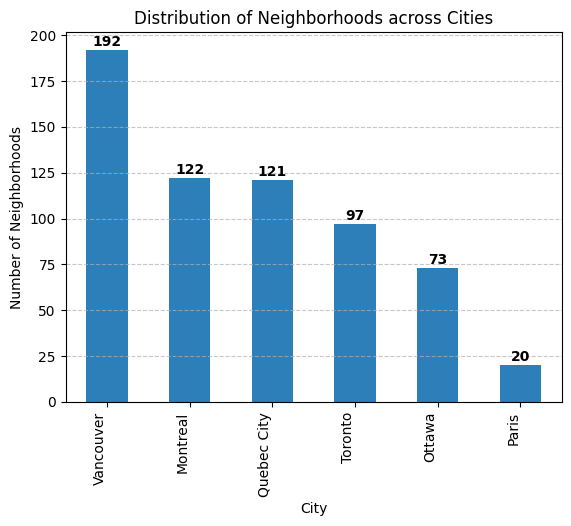

In [4]:
# FYI, we already retrieved earlier the city index order based on the value count
neigh_distrib_city_counts = cities_df['City'].value_counts()
cities_index = neigh_distrib_city_counts.index

# Plot the number of neighborhoods per city
neigh_distrib_city_viz = neigh_distrib_city_counts.plot(kind='bar', color='#2c7fb8', title='Distribution of Neighborhoods across Cities')
plt.xlabel('City')
plt.ylabel('Number of Neighborhoods')
for idx, value in enumerate(neigh_distrib_city_counts):
    neigh_distrib_city_viz.text(idx, value + 0.5, str(value), ha='center', va='bottom', fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Our insights:
- Vancouver has the highest number of neighborhoods (192).
- Overall the urban subdivision is higher in canada than in France. This could indicate a richer diversity in community characteristics and/or a larger city surface area.
- Conversely, Paris stands out with only 20 neighborhoods.

The variability in the number of neighborhoods per city suggests that any city-specific analysis may need to account for the differing scales. For example, models and insights developed for Vancouver may not be directly applicable to Paris, given the vast difference in neighborhood count.

**Urban Density Distribution across Cities**

Let's review the cities spacial layout now. Do some cities have significantly more central neighborhoods than others?

In [19]:
inner_outer_counts = cities_df.groupby(['City', 'innerouter']).size().unstack(fill_value=0)
inner_outer_counts = inner_outer_counts.reindex(cities_index)
inner_outer_counts

innerouter,inner,outer
City,,
Vancouver,154,38
Montreal,10,112
Quebec City,103,18
Toronto,10,87
Ottawa,71,2
Paris,1,19


Our insights:
- Montreal and Toronto are more decentralized, with most neighborhoods falling outside the inner radius.
- Ottawa and Vancouver are highly centralized, meaning a majority of their neighborhoods are closer to the city center.
- Paris also has a decentralized structure, which is expected given its strict zoning laws and historical preservation of the inner city.

## [4] Exploring the Venues
**Venue Frequency Distribution across Cities**

We’ll compare the density of venues with the density of neighborhoods across cities.

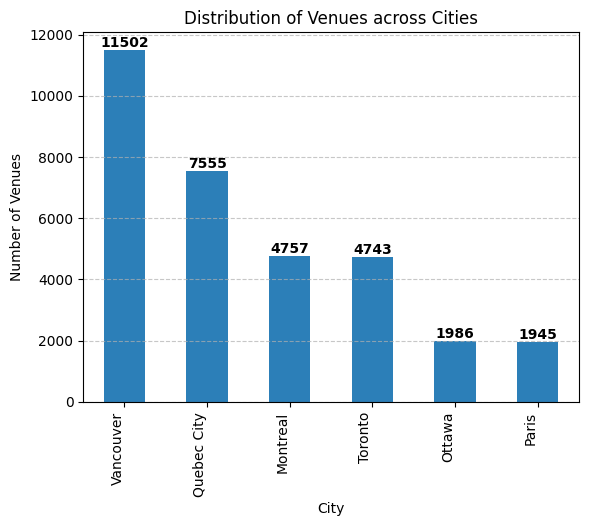

In [6]:
venues_distrib_city_sum = cities_df.groupby('City')['Total Venues'].sum().sort_values(ascending=False)

# Plot the number of venues per city
venues_distrib_city_viz = venues_distrib_city_sum.plot(kind='bar', color='#2c7fb8', title='Distribution of Venues across Cities')
plt.xlabel('City')
plt.ylabel('Number of Venues')
for idx, value in enumerate(venues_distrib_city_sum):
    venues_distrib_city_viz.text(idx, value + 0.5, f"{int(value)}", ha='center', va='bottom', fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Our insights:
- The number of venues tends to follow the number of neighborhoods, since data was retrieved through an API call with a set threshold. However, important exceptions exist.
- Vancouver is a major outlier with 11502 venues retrieved. It leads with nearly twice more venues than Quebec City, the second city. This shows that Vancouver is extremely venue-dense and vibrant overall.
- Quebec City retrieved significantly more venues (7555) than Montreal (4757) despite both cities having nearly the same number of neighborhoods (121 vs. 122). Although Montreal is a bigger city, Quebec City's more touristic nature likely led to a higher number of retrieved venues, suggesting a retrieval bias rather than a true venue richness.
- Conversely, Montreal and Toronto retrieved almost the same number of venues (4757 vs. 4743), despite Toronto having fewer neighborhoods (97 vs. 122). This suggests that Toronto’s neighborhoods are larger.
- Ottawa has over 3 times more neighborhoods than Paris (73 vs. 20), yet both cities retrieved a similar number of venues (1986 vs. 1945). This points to Paris neighborhoods being much denser in venues compared to Ottawa’s.

**Most Common Venue Labels across Neighborhoods**

We’ll retrieve the most common venue labels in each neighborhood to understand which types of amenities are frequently available. We'll use smoothed and comparable data not to show large number of venues gaps across labels. So instead of counting how many venues are in each labels, we'll just check the frequency of these labels across the top 5 most commun labels.

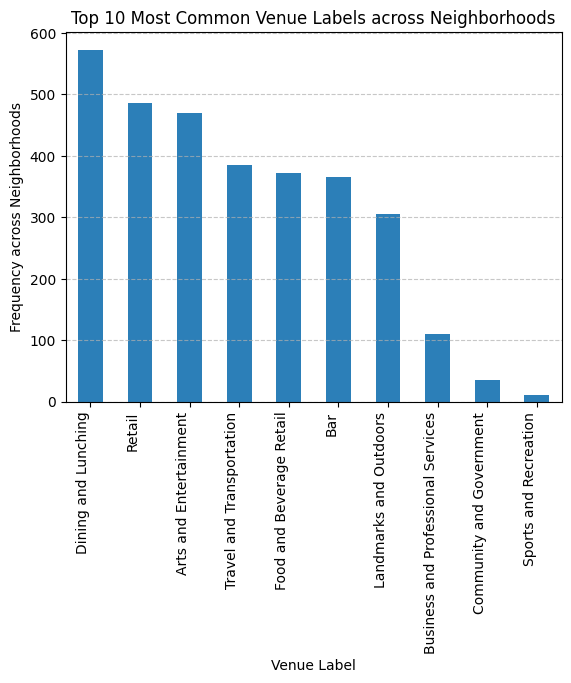

In [7]:
# Get the top 10 most common venue labels
label_freq = cities_df[['1st Most Common Label', '2nd Most Common Label', '3rd Most Common Label', 
                          '4th Most Common Label', '5th Most Common Label']].apply(pd.Series.value_counts)
top_label_freq = label_freq.sum(axis=1).sort_values(ascending=False).head(10)

# Plot top venue labels
top_label_viz = top_label_freq.plot(kind='bar', color='#2c7fb8', title='Top 10 Most Common Venue Labels across Neighborhoods')
plt.xlabel('Venue Label')
plt.ylabel('Frequency across Neighborhoods')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Our insights:
- The chart reveals that 'Dining and Lunching', 'Retail' and 'Art and Entertainment' are the most common venue labels across neighborhoods, indicating a strong presence of social and shopping options.
- 'Travel and Transportation' and 'Food and Beverage Retail' also feature prominently, suggesting that neighborhoods are generally well-serviced for mobility and daily essentials.
- However, 'Community and Government' and 'Sports and Recreation' venues are much less common, highlighting potential gaps in public and recreational facilities that could impact quality of life.

**Most Common Venue Quategories across Neighborhoods**

We’ll do the same exercise as before but with venue categories to see if we can notice a biased trend in the most represented type of venues.

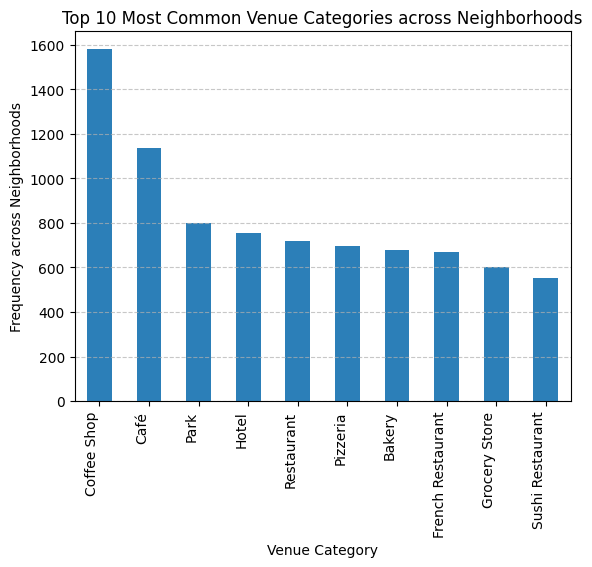

In [10]:
# Get the top 10 most common venue categories
top_category_freq = nearbyvenues_df['Venue Category'].value_counts().head(10)
# Retrieve the index for later
top_category_index = top_category_freq.index

# Plot the top venue categories
top_category_viz = top_category_freq.plot(kind='bar', color='#2c7fb8', title='Top 10 Most Common Venue Categories across Neighborhoods')
plt.xlabel('Venue Category')
plt.ylabel('Frequency across Neighborhoods')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The data reveals a strong dominance of Coffee Shops, Cafés and Restaurants as the most common venue types across neighborhoods. There seems to be a notable **bias in the Foursquare data** source overrepresenting these popular and trendy venues, while potentially underrepresenting less frequented or less “check-in-friendly” categories like Community Centers, Public Services, or even Educational Facilities. This bias could skew strategic insights, as it may not fully capture a neighborhood's practical resources for families or long-term residents, focusing instead on transient or leisure-oriented locations. The analysis would have been significantly more comprehensive with Google Maps, though it would have incurred an approximate cost of $400. **Foursquare is free!**

Our insights:
- However, if we put this aside, the data still reflects a trend in urban areas towards casual, social spaces and may be indicative of high consumer demand for accessible gathering spots.
- The presence of Grocery Stores highlights essential services. Categories like Sushi Restaurants, French Restaurants, and Pizzerias suggest a cultural preference in dining options, likely influenced by both local demand and tourism, as supported by the Hotel category.

**Most Common Venue Categories across Cities**

We’ll now investigate the source of the list of the Top 10 Most Common Venue Categories to understand how are these categories spread across the cities. We would like to examine if there is a geographic bias in venue distribution. We have an intuition that Foursquare is more popular in anglosaxon countries than latin countries.

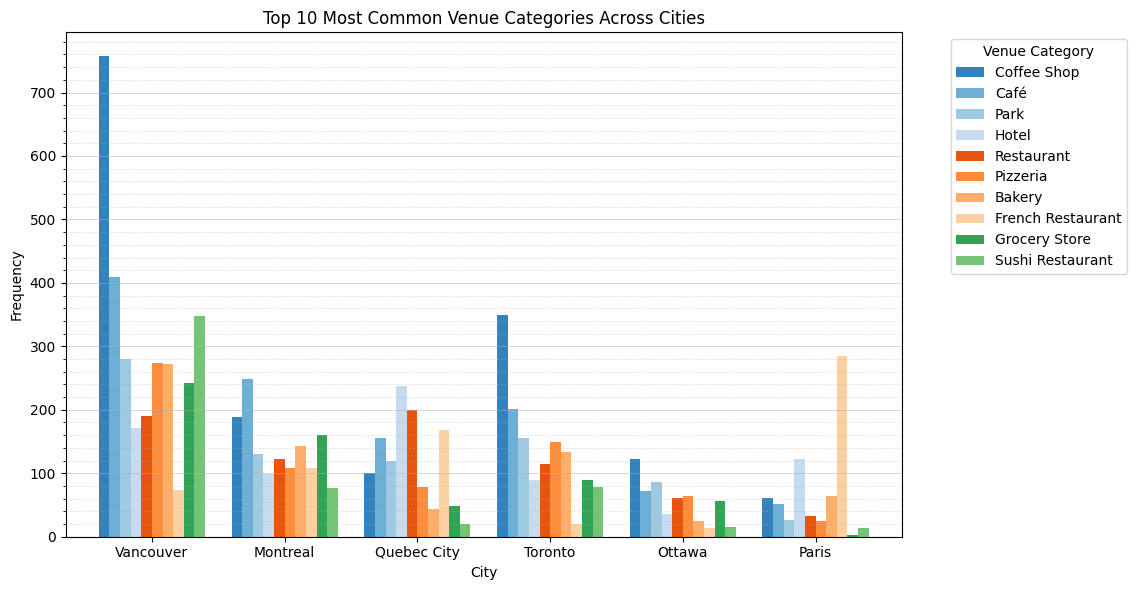

In [12]:
# Count the frequency of the top 10 categories in the cities
top_category_df = nearbyvenues_df[nearbyvenues_df['Venue Category'].isin(top_category_index)]
topcity_category_freq = top_category_df.groupby(['City', 'Venue Category']).size().unstack(fill_value=0)
topcity_category_freq = topcity_category_freq[top_category_index] 
topcity_category_freq = topcity_category_freq.loc[cities_index]

# Plot the top venue categories
topcity_category_freq.plot(kind='bar', stacked=False, figsize=(11.5, 6), color=sns.color_palette("tab20c", len(top_category_index)), width=0.8)
plt.title('Top 10 Most Common Venue Categories Across Cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Venue Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
plt.grid(which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5, alpha=0.4)
plt.tight_layout()
plt.show()

First, we still find proof that the data is biased.

- Indeed, there are close to no 'Grocery Stores' in Paris, which, as a Parisian, seems inaccurate.
- Then, why are Vancouver and Toronto so obsessed with coffee?

Although it does not significantly distort our analysis:

- Even though Paris shows fewer dedicated coffee venues, it might be because parisian cafés often double as full-service restaurants during lunch hours, blending dinning and coffee experiences. Hence they might be referenced instead as 'French Restaurants'.
- Conversly, Toronto and Vancouver coffee shops might culturally serve as casual lunch and hang out locations.
- After removing outliers, the cities exhibit a somehow balanced distribution of venue categories within social amenities, making them attractive to both residents and tourists seeking diverse neighborhood experiences.

**Most Common Venue Categories by Cities**

Now we need bar plots for each city, showing the top 10 most common venue categories proper to each city.

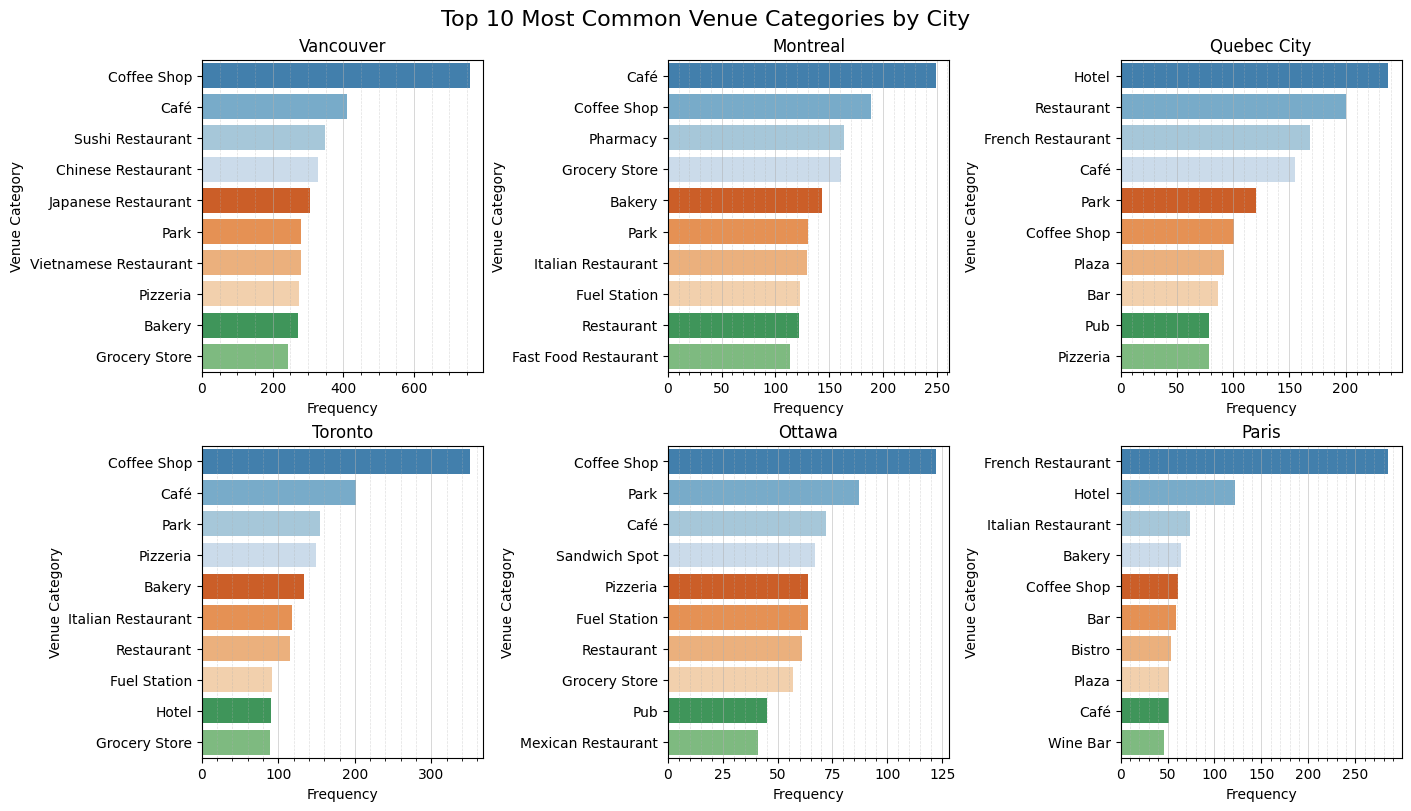

In [17]:
# Identify the top 10 venue categories for each city
top_category_percity = nearbyvenues_df.groupby('City')['Venue Category'].value_counts().groupby(level=0).head(10)
top_category_percity_df = nearbyvenues_df[nearbyvenues_df.set_index(['City', 'Venue Category']).index.isin(top_category_percity.index)]

# Define the grid size based on the number of cities           
n_cities = len(cities_index)
n_cols = 3
n_rows = (n_cities + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), constrained_layout=True)
fig.suptitle('Top 10 Most Common Venue Categories by City', fontsize=16)
axes = axes.flatten() # Flatten in case we have fewer plots than grid spaces

# Loop through each city and plot
for i, city in enumerate(cities_index):
    top_category_incity_df = top_category_percity_df[top_category_percity_df['City'] == city]
    top_category_incity_freq = top_category_incity_df['Venue Category'].value_counts().head(10)
    
    sns.barplot(x=top_category_incity_freq.values, 
                y=top_category_incity_freq.index, 
                hue=top_category_incity_freq.index,
                palette="tab20c", 
                ax=axes[i]
               )
    axes[i].set_title(city)
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Venue Category')
    axes[i].minorticks_on()  # Enable minor ticks
    axes[i].tick_params(axis='y', which='minor', left=False)
    axes[i].grid(which='major', axis='x', linestyle='-', linewidth=0.5, alpha=0.7)  # Major grid lines
    axes[i].grid(which='minor', axis='x', linestyle='--', linewidth=0.5, alpha=0.4)  # Minor grid lines

# Remove any empty subplots if the number of cities is less than grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Adjust layout and leave space for the main title
plt.show()

These new distribution charts once again reveal proof that the data is biased:
- We still witness at least 3 to 4 times more coffee shops in Canadian cities than any other venues.
- While French restaurants rank highly in Paris, bakeries are surprisingly not dominant (only appearing in 4th place). This contradicts expectations, as bakeries should be among the top venues in Paris.
- Also, curious thing, Montreal is the only city listing pharmacies. And they are the third most common venues. Why no pharmacies in Paris? We expect them to be as prominent as bakeries in Paris.

This put aside, we retrieve the following new usefull insights:
- Vancouver stands out with a variety of ethnic food venues (Japanese, Chinese, Vietnamese, Italian) suggesting the presence of multicular neighborhoods.
- Only Canadian cities have a higher occurrence of parks. I think it fairly suggests a focus on recreational outdoor spaces in Canadian cities. I aknowledge that that Paris has many gardens and green spaces, such as Jardin du Luxembourg and Parc Monceau but these are french gardens. You are not supposed to enjoy them as freely as canadians (picnic, football, parties, outdoor gym sessions). They are clsoer to cultural spaces.
- Ottawa might have a strong latino immigration owing the high number of 'Mexican Restaurants'.
- Only Ottawa, Quebec City and Paris rank venues like pubs, wine bars, and bistros highly, indicating a focus on social drinking spots.
- Fuel stations & sandwich spots ranking highly in Ottawa might indicate commuting habits due to government employment concentration.
- Hotels ranking highly in Paris and Quebec City do righfully indicate a strong tourist economy.

**Descriptive Statistics of Venue Labels across Neighborhoods**

In [42]:
# Summarize venue labels stats
citieslabelcount_df = citieslabelfreq_df.groupby(['City', 'Neighborhood']).sum().reset_index()
stats1_df = citieslabelcount_df.describe().round(2)#.astype(int)
median_values1_df = citieslabelcount_df.select_dtypes(include=['number']).median().round(2).to_frame().T # .astype(int)
median_values1_df.index = ['median']
rankedstats1_df = stats1_df.sort_values(by="mean", axis=1, ascending=False)
rankedstats1_withmedian_df = pd.concat([rankedstats1_df, median_values1_df])

# Summarize total venue labels stats
stats2_df = cities_df[['Total Venues']].describe().round(0).astype(int)
median_values2_df = cities_df[['Total Venues']].median().round(0).astype(int).to_frame().T
median_values2_df.index = ['median']
stats2_withmedian_df = pd.concat([stats2_df, median_values2_df])

# Display the merged statistics
rankedstats1_withmedian_df['Total Venues'] = stats2_withmedian_df.values.flatten()
rankedstats1_withmedian_df = rankedstats1_withmedian_df.loc[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]
print("Descriptive Statistics of Venue Labels across Neighborhoods:\n")
rankedstats1_withmedian_df

Descriptive Statistics of Venue Labels across Neighborhoods:



,Dining and Lunching,Retail,Travel and Transportation,Landmarks and Outdoors,Food and Beverage Retail,Arts and Entertainment,Bar,Business and Professional Services,Event,Community and Government,Education,Health and Medicine,Financial Service,Office,Sports and Recreation,Total Venues
count,613.00,613.00,613.00,613.00,613.00,613.00,613.00,613.00,613.00,613.00,613.00,613.00,613.00,613.00,613.00,625
mean,0.47,0.16,0.10,0.09,0.08,0.05,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,52
median,0.52,0.12,0.06,0.04,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28
std,0.21,0.18,0.14,0.13,0.09,0.08,0.05,0.05,0.00,0.01,0.01,0.00,0.00,0.02,0.02,83
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
25%,0.38,0.06,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9
50%,0.52,0.12,0.06,0.04,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28
75%,0.61,0.20,0.13,0.10,0.10,0.06,0.06,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,91
max,1.00,1.00,1.00,1.00,0.50,1.00,0.33,1.00,0.01,0.05,0.20,0.02,0.03,0.29,0.25,700


Let's disregard venue labels with lower means and standard deviations in this section of our analysis, as these may be skewed due to incomplete data in Foursquare.

Instead, we'll concentrate on venue labels with higher means and standard deviations, such as 'Dining and Lunching', 'Retail', 'Landmarks and Outdoors', 'Food and Beverage Retail', 'Arts and Entertainment' and 'Bars'. These labels reveal a distinction between destination hubs and underserved hubs. In some neighborhoods, high concentrations of these venues indicate strategic hotspots with significant foot traffic, attracting both locals and tourists for social, commercial, or recreational activities. Conversely, other neighborhoods seem to lack these amenities. It might be signaling opportunities for lower rents though, we'll see.

## [5] Setting up the User Profiles

We need to build different user profiles based on prioritized Venue Labels. Each profile would prioritise leaving close to amenities fitting their personal key interests and lifestyle to maximimse their quality of life.

**Summary of Venue Diversity Across the Dataset**

In [40]:
# Count of unique categories curated from all the returned venues
print(f'We identified across our dataset a total of '
f'{len(nearbyvenuescleaned_df["Venue"].unique())} unique venues.\nThey are categorized into '
f'{len(nearbyvenuescleaned_df["Venue Category"].unique())} distinct venue categories, which are further grouped under '
f'{len(nearbyvenuescleaned_df["Venue Label"].unique())} unique venue labels.')

We identified across our dataset a total of 11233 unique venues.
They are categorized into 483 distinct venue categories, which are further grouped under 15 unique venue labels.


**Most Common Venue Labels**

In [25]:
# Venue Label ranked by number of venues classified within
label_count = pd.Series(nearbyvenuescleaned_df['Venue Label'])
label_count.value_counts()[:]

Venue Label
Dining and Lunching                   8097
Retail                                1938
Travel and Transportation             1074
Food and Beverage Retail               979
Landmarks and Outdoors                 973
Bar                                    731
Arts and Entertainment                 642
Business and Professional Services     155
Office                                  46
Community and Government                35
Sports and Recreation                   30
Education                               14
Financial Service                        3
Health and Medicine                      2
Event                                    1
Name: count, dtype: int64

**Investigating the Venue Labels**

I am not sure I should consider the venue label 'Travel and Transportation' when building our User Profiles. Does it include hotels and travel agencies or public transports for a daily use or just random locations?

In [43]:
# Filter for rows where the 'Venue Label' is 'Travel and Transportation'
travel_and_transportation_df = nearbyvenuescleaned_df[nearbyvenuescleaned_df['Venue Label'] == 'Travel and Transportation']
travel_and_transportation_categories = travel_and_transportation_df['Venue Category'].unique()
print(f"Categories under 'Travel and Transportation': {travel_and_transportation_categories}")

Categories under 'Travel and Transportation': ['Bed and Breakfast' 'Hotel' 'Hostel' 'Fuel Station' 'Taxi Stand'
 'Rest Area' 'Travel and Transportation' 'Tourist Information and Service'
 'Travel Agency' 'Rail Station' 'Motel' 'Bus Station'
 'Rental Car Location' 'Airport' 'Boat or Ferry' 'Charter Bus'
 'Public Transportation' 'Metro Station' 'Bus Line' 'Bike Rental'
 'Bus Stop' 'Intersection' 'Moving Target' 'Light Rail Station'
 'Airport Terminal' 'Train' 'Airport Service' 'Airport Lounge'
 'International Airport' 'Hotel Pool' 'Airport Ticket Counter' 'Platform'
 'RV Park' 'Plane' 'Truck Stop' 'Pier' 'Marine Terminal'
 'Electric Vehicle Charging Station' 'Limo Service' 'Heliport'
 'Airport Food Court' 'Inn' 'Resort']


The 'Travel and Transportation' label Seems to include a lot of public transport locations hence I will be using this label in the User Profiling.

Then, I also need to clarify the venue label 'Education'. I am not sure where I should include it according if it includes educational facilities for children or for students.

In [44]:
# Filter for rows where the 'Venue Label' is 'Education'
education_df = nearbyvenuescleaned_df[nearbyvenuescleaned_df['Venue Label'] == 'Education']
education_categories = education_df['Venue Category'].unique()
print(f"Categories under 'Education': {education_categories}")

Categories under 'Education': ['College Soccer Field' 'College Auditorium' 'College Rec Center'
 'College Arts Building' 'College Theater' 'Education' 'College Cafeteria'
 'College Gym' 'University' 'College Quad' 'Music School']


The 'Education' label includes only establishments at the college level and beyond, aligning more with a students rather than a families.

**User Profiles Initial Draft**

So after clarifying some venue labels, I can propose 3 different User Profiles and a draft of the ranked list of venue labels that would be prioritised for each of these user profiles:
- Family-Friendly profile : Health and Medicine, Food and Beverage Retail, Sports and Recreation, Landmarks and Outdoors.
- Social-Friendly profile : Bar, Arts and Entertainment, Dining and Lunching, Retail.
- Career-Friendly profile : Office, Business and Professional Services, Travel and Transportation, Dining and Lunching.

In [45]:
# Define the specific venue labels for each profile in one dictionary
profilelabels_dic = {
    'Family': ['Food and Beverage Retail', 'Health and Medicine', 'Sports and Recreation', 'Landmarks and Outdoors'],
    'Social': ['Bar', 'Arts and Entertainment', 'Dining and Lunching', 'Retail'],
    'Career': ['Office', 'Business and Professional Services', 'Travel and Transportation', 'Dining and Lunching']
}

We will now conduct a deeper investigation into the venues assigned to these labels to determine if there are sufficient data entries for a robust analysis.

In [46]:
# Build a set to get the list of all unique labels from the profile dictionary
uniquelabels_set = set(label for labels in profilelabels_dic.values() for label in labels)

In [47]:
# Define the number of top venue categories to display
num_top_categories = 10

# Loop through each label in the unique labels
print(f"\033[1m---- Top 10 categories for ----\033[0m")
print("\n")
for label in uniquelabels_set:
    print(f"\033[1m---- {label} ----\033[0m")
    # Filter the dataframe for the current venue label
    label_df = nearbyvenuescleaned_df[nearbyvenuescleaned_df['Venue Label'] == label]
    # Get the top 10 venue categories for this label
    top_categories_df = label_df['Venue Category'].value_counts().head(num_top_categories)
    # Print the formatted output similar to your example
    for venue, count in top_categories_df.items():
        print(f"{venue:30} {count:.0f}")
    print("\n")

---- Top 10 categories for ----


---- Dining and Lunching ----
Coffee Shop                    828
Café                           520
Pizzeria                       417
French Restaurant              403
Bakery                         370
Restaurant                     358
Italian Restaurant             313
Sandwich Spot                  308
Fast Food Restaurant           307
Sushi Restaurant               261


---- Health and Medicine ----
Chiropractor                   1
Dentist                        1


---- Office ----
Office Supply Store            32
Office                         7
Post Office                    3
Coworking Space                2
Doctor's Office                1
Tech Startup                   1


---- Landmarks and Outdoors ----
Park                           467
Plaza                          87
Playground                     58
Hiking Trail                   57
Garden                         34
Historic and Protected Site    30
Harbor or Marina              

Although our profile preferences were logical, I need to adjust them due to insufficient venue data from Foursquare. The platform didn't provide enough useful venues in certain categories to accurately map the amenities. As a result, we will adjust the following profile labels:

- 'Health and Medicine' will be removed from the Family Friendly profile due to a lack of available venues.
- 'Business and Professional Services' will be removed from the Career Friendly profile, as the identified landmarks are not relevant enough for this group.
- 'Retail' will be add up to each profile group as parts of the retrieved venue list seems to be relevant for everyone.

**Final User Profiles**

Thus, the updated prioritization of venue types for each profile is as follows:

- **Family-Friendly profile**: Food and Beverage Retail, Sports and Recreation, Landmarks and Outdoors, Retail.
- **Social-Friendly profile** : Bar, Arts and Entertainment, Dining and Lunching, Retail.
- **Career-Friendlyprofile** : Office, Travel and Transportation, Dining and Lunching, Retail.

In [48]:
# Update the venue labels for each profile in one dictionary
profilelabels_dic = {
    'Family': ['Food and Beverage Retail', 'Sports and Recreation', 'Landmarks and Outdoors', 'Retail'],
    'Social': ['Bar', 'Arts and Entertainment', 'Dining and Lunching', 'Retail'],
    'Career': ['Office', 'Travel and Transportation', 'Dining and Lunching', 'Retail'],
}

## [6] Explore the rents

We need to help our future renters make informed decisions based on their budget and space requirements. To explore the rent values across neighborhoods, let's start by simply calculating means, medians, and standard deviations.

In [57]:
# Group by city and calculate mean, median, and standard deviation for rent columns
rent_columns_USD = ['Median Rent Studio in USD', 'Median Rent 1 Bedroom in USD', 'Median Rent 2 Bedrooms in USD', 'Median Rent 3 Bedrooms in USD']
summary_stats = cities_df.groupby('City')[rent_columns_USD].agg(['mean', 'median', 'std']).round(0)
summary_stats = summary_stats.fillna(0).astype(int)
# Calculate overall std increase from Studio to 3 Bedrooms for each city
std_increase = ((summary_stats.loc[:, ('Median Rent 3 Bedrooms in USD', 'std')] - 
                 summary_stats.loc[:, ('Median Rent Studio in USD', 'std')]) / 
                summary_stats.loc[:, ('Median Rent Studio in USD', 'std')]) * 100
summary_stats[('Studio to 3 Bedrooms', 'std increase')] = std_increase.fillna(0).round(0).astype(float)
summary_stats = summary_stats.sort_values(by=('Studio to 3 Bedrooms', 'std increase'), ascending=False)
summary_stats[('Studio to 3 Bedrooms', 'std increase')] = (summary_stats[('Studio to 3 Bedrooms', 'std increase')].astype(int).astype(str) + '%')
summary_stats

Median Rent Studio in USD              \
                                 mean median  std   
City                                                
Paris                             969    944  121   
Toronto                          1391   1376  205   
Montreal                          744    748   93   
Vancouver                        1395   1355  231   
Ottawa                           1102   1106  121   
Quebec City                       751    696  157   

            Median Rent 1 Bedroom in USD              \
                                    mean median  std   
City                                                   
Paris                               1550   1511  194   
Toronto                             1694   1657  223   
Montreal                             980    969  126   
Vancouver                           1643   1626  195   
Ottawa                              1346   1313  179   
Quebec City                          930    904  154   

            Median Rent 2 Bedrooms in USD              \
                                     mean median  std   
City                                                    
Paris                                2117   2038  278   
Toronto                              2062   1979  332   
Montreal                             1119   1122  170   
Vancouver                            2166   2130  320   
Ottawa                               1628   1581  203   
Quebec City                          1047    996  187   

            Median Rent 3 Bedrooms in USD             Studio to 3 Bedrooms  
                                     mean median  std         std increase  
City                                                                        
Paris                                2822   2718  370                 206%  
Toronto                              2436   2310  535                 161%  
Montreal                             1342   1307  241                 159%  
Vancouver                            2501   2235  593                 157%  
Ottawa                               1877   1850  240                  98%  
Quebec City                          1254   1160  255                  62%

The biggest insight here is that the standard deviation increases with the number of bedrooms. 
- The lowest increase is in Quebec City by 62% : from 157 USD std for studios to 255 USD std for 3-bedrooms.
- The highest surge is in Paris by 206% : from 121 USD std for studios to 370 USD std for 3-bedrooms.

This means that the rent variability increases for larger units, likely due to the broader range of property types and surfaces in the larger-unit category.

**Monthly Rent Distribution by Unit Size and City**

Let's now retrieve some interesting insights from the rental costs distributions.

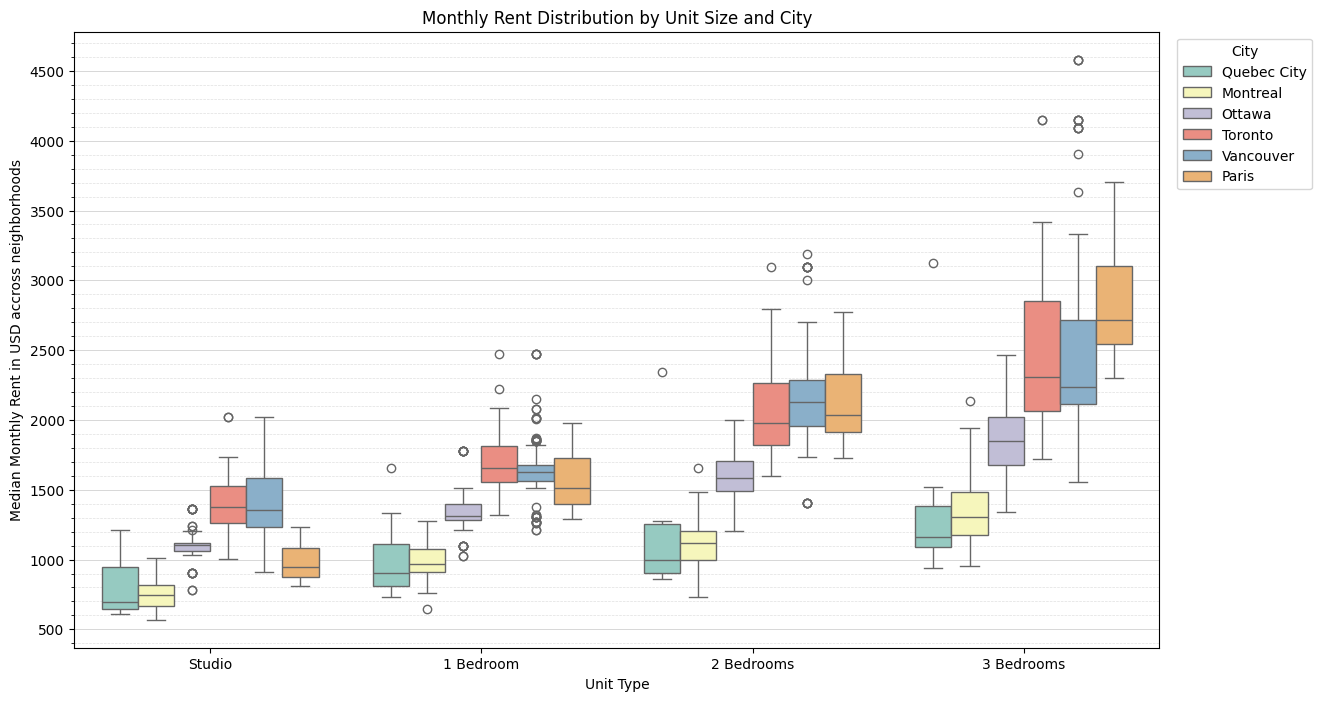

In [58]:
# Melt the DataFrame to have a "long format" suitable for seaborn's boxplot function
melted_df = cities_df.melt(id_vars='City', value_vars=rent_columns_USD, 
                           var_name='Unit Type', value_name='Rent in USD')
melted_df['Unit Type'] = melted_df['Unit Type'].str.replace("Median Rent ", "").str.replace(" in USD", "")

# Plot a grid of box plots for each city and apartment type
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_df, x='Unit Type', y='Rent in USD', hue='City', palette="Set3")
plt.title("Monthly Rent Distribution by Unit Size and City")
plt.ylabel("Median Monthly Rent in USD accross neighborhoods")
plt.xlabel("Unit Type")
plt.xticks(rotation=0, ha='center')
plt.legend(title='City', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
plt.grid(which='major', axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5, alpha=0.4)
plt.show()

Overall, the upper quartile (75%+ higher rents) tends to be larger than the lower one (25%- lowest rents), this is because they tend to be thresolded to a minimum by square meter, while you can always get more creative with amenities to justify a higher rent.

Also, while the jump in rent from studios to 1-bedroom units is not very meaningful, the next categories jumps in rent are more significant, suggesting that renters should only look for an extra bedroom only if they must prioritize space over cost-efficiency.

The next step is to highlight the most affordable cities and the most expensive cities with the help of two other insights.

**Most affordable cities**

In [60]:
# Identify the minimum rent for 'Median Rent 3 Bedrooms in USD' for each city
print("Minimum Median Rent for 3 Bedrooms:\n")
minrent3bedroom_df = cities_df.groupby('City')['Median Rent 3 Bedrooms in USD'].idxmin()
minrent3bedroom_df = cities_df.loc[minrent3bedroom_df, ['City', 'Postalcode', 'Borough','Neighborhood', 'Median Rent 3 Bedrooms in USD']]
minrent3bedroom_df['Median Rent 3 Bedrooms in USD'] = minrent3bedroom_df['Median Rent 3 Bedrooms in USD'].round(0).astype(int)
minrent3bedroom_df = minrent3bedroom_df.sort_values(by='Median Rent 3 Bedrooms in USD', ascending=True).reset_index(drop=True)
minrent3bedroom_df

Minimum Median Rent for 3 Bedrooms:



,City,Postalcode,Borough,Neighborhood,Median Rent 3 Bedrooms in USD
0,Quebec City,G1J,Lower Riverbank,Lower Riverbank,938
1,Montreal,H3N,Parc-Extension,Parc-Extension,951
2,Ottawa,K6A,Hawkesbury,Hawkesbury,1341
3,Vancouver,V4A,Surrey,Surrey Southwest,1552
4,Toronto,M1H,Scarborough,Cedarbrae,1721
5,Paris,75020,Ménilmontant,"Belleville, Saint-Fargeau, Le Père-Lachaise, C...",2301


Quebec City, Montreal and Ottawa are the most affordable cities for rentals.

- Quebec City, Montreal and Ottawa have the most stable pricing. Their boxes and whiskers length (range) are smaller, making them more predictable rental markets. Budget-conscious renters who are looking for rentals below the median or closer to the 25th percentile will have more choice in these cities.
- The median rent differences between unit categories in these three cities are well-balanced. Even more for Quebec City with an extra rent cost of 100 USD per bedroom. For comparison, in Paris, you pay an average an extra rent cost of 500 USD per bedroom.
- Conversely, Vancouver and Toronto, especially in the 2-bedroom and 3-bedroom categories, do not show a wide range of prices below the median for budget-conscious renters looking for basic accommodations.

Paris is an outlier.

- Even though Paris is considered as one of the most expensive cities in our analysis, its studios prices are conversely the third most affordable after Quebec and Montreal and lower than Ottawa. I don't think they suggest more budget options in the studio category but actually they match the offer ranging from as little as 9 square meters to 20 square meters.

**Most expensive cities**

In [61]:
# Identify the maximum rent for 'Median Rent 3 Bedrooms in USD' for each city
print("Maximum Median Rent for 3 Bedrooms:\n")
maxrent3bedroom_df = cities_df.groupby('City')['Median Rent 3 Bedrooms in USD'].idxmax()
maxrent3bedroom_df = cities_df.loc[maxrent3bedroom_df, ['City', 'Postalcode', 'Borough','Neighborhood', 'Median Rent 3 Bedrooms in USD']]
maxrent3bedroom_df['Median Rent 3 Bedrooms in USD'] = maxrent3bedroom_df['Median Rent 3 Bedrooms in USD'].round(0).astype(int)
maxrent3bedroom_df = maxrent3bedroom_df.sort_values(by='Median Rent 3 Bedrooms in USD', ascending=False).reset_index(drop=True)
maxrent3bedroom_df

Maximum Median Rent for 3 Bedrooms:



,City,Postalcode,Borough,Neighborhood,Median Rent 3 Bedrooms in USD
0,Vancouver,V9L,Duncan,Duncan,4580
1,Toronto,M5J,Downtown Toronto,"Harbourfront, Union Station, Toronto Islands",4150
2,Paris,75001,Le Louvre,"Saint-Germain-l'Auxerrois, Les Halles, Le Pala...",3702
3,Quebec City,G8M,Normandin,Albanel,3121
4,Ottawa,K2P,Centretown,Centretown,2464
5,Montreal,H2J,Plateau Mont-Royal,Plateau Mont-Royal Center 1,2138


Vancouver, Toronto, and Paris rank as the most expensive cities for rentals.

- The high standard deviations and the upper whiskers length in these cities, especially in the 2- and 3-bedroom categories, indicate greater rent variability for these large units. In Vancouver, the 3-bedroom category's upper end even reaches a maximum median rent of 4,580 USD per month in Duncan. It likely reflects  more high-end properties than affordable ones, more premium locations or additional amenities. To give another comparison, the least expensive 3-bedroom rent in Paris is higher than the most expensive rent in Montreal.
- Vancouver and Toronto have a particularly developed luxury market. From 1-bedroom units onwards, the cities show several median rents upper outliers in the blox plot. The maximum rent for 3-bedrooms units reaching 4.6K USD a month, 3K USD more than Quebec City. A pronounced jump that indicates areas or neighborhoods with extreme pricing in these cities, possibly due to luxury units or highly desirable locations within these cities.